In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import nquad

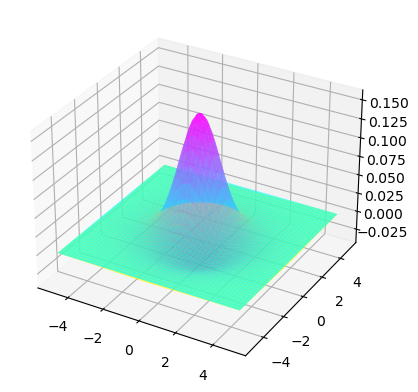

In [2]:
# Define the Gaussian function
def gaussian(x, y, sigma):
    return 1/(2*np.pi*sigma**2)*np.exp(-(x**2+y**2)/(2*sigma**2))

# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the Gaussian function at each point in the grid
sigma1 = 1
sigma2 = 2
Z1 = gaussian(X, Y, sigma1)
Z2 = -gaussian(X, Y, sigma2)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z1, cmap='cool', alpha=0.7)
ax.plot_surface(X, Y, Z2, cmap='autumn', alpha=0.7)
plt.show()


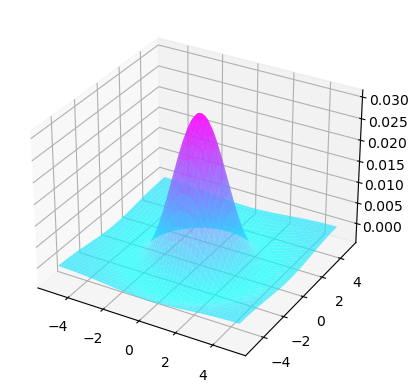

In [3]:
def spatial_kernel(x, y, sigma1, sigma2):
    gaussian1 = gaussian(x, y, sigma1)
    gaussian2 = gaussian(x, y, sigma2)
    result = gaussian1 - gaussian2
    return result

# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
sigma1 = 1.5
sigma2 = 2
Z = spatial_kernel(X, Y, sigma1, sigma2)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='cool', alpha=0.7)
plt.show()


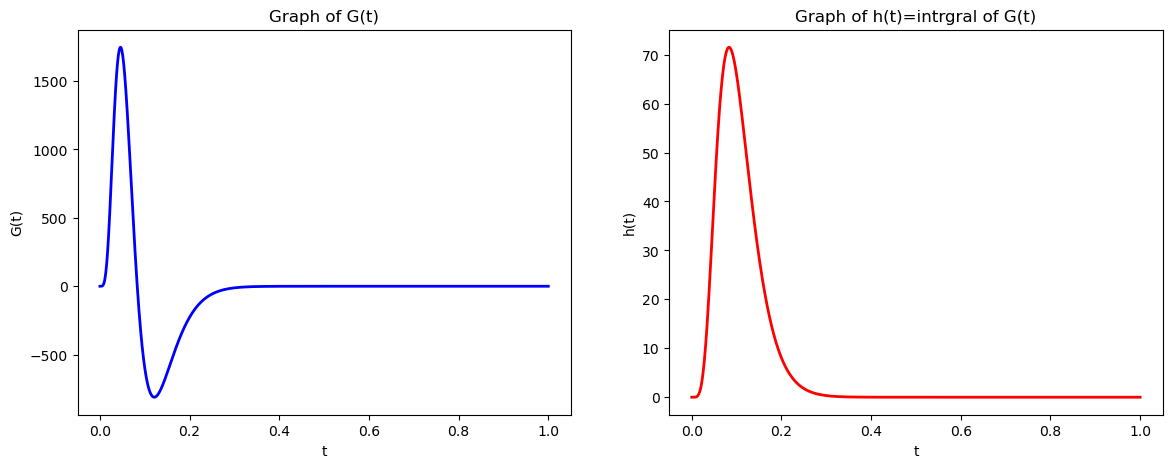

In [3]:
# 定义 G(t) 函数:Temporal kernal
def G(t):
    tau0 = 0.01
    tau1 = 0.02
    return t**5/tau0**6 * np.exp(-t / tau0) - t**5/tau1**6 * np.exp(-t / tau1)

# 定义 h(t) 函数:Temporal kernal的积分
def h(t):
    s = np.linspace(0, t, 1000)
    g = G(t - s)
    return simps(g, s)

# 生成数据点
t = np.linspace(0, 1, 1000)
y1 = G(t)
y2 = np.array([h(ti) for ti in t])

# 创建画布和子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 绘制 G(t) 图像
ax1.plot(t, y1, color='blue', linestyle='-', linewidth=2)
ax1.set_xlabel('t')
ax1.set_ylabel('G(t)')
ax1.set_title('Graph of G(t)')

# 绘制 h(t) 图像
ax2.plot(t, y2, color='red', linestyle='-', linewidth=2)
ax2.set_xlabel('t')
ax2.set_ylabel('h(t)')
ax2.set_title('Graph of h(t)=intrgral of G(t)')

# 显示图像
plt.show()


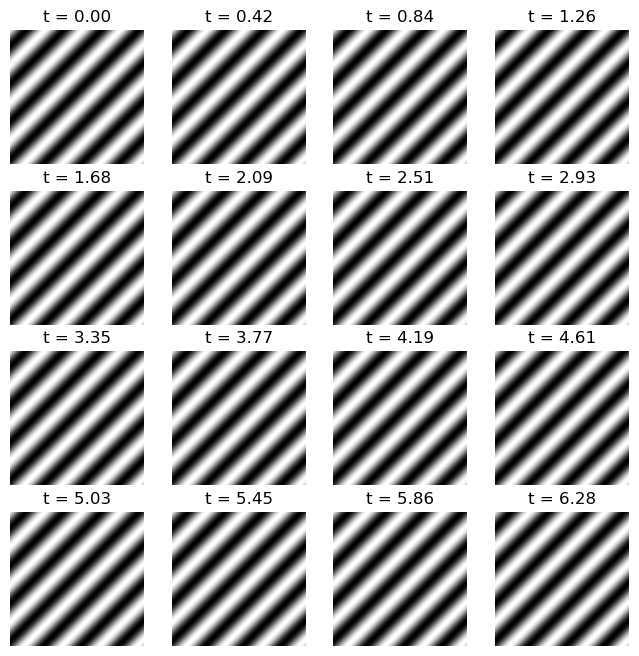

In [5]:
def drifting_grating(I_0, epsilon, omega, phi, k, theta, x, y, t):
    k_x = k * np.cos(theta)
    k_y = k * np.sin(theta)
    intensity = I_0 * (1 + epsilon * np.sin(omega * t + k_x * x + k_y * y - phi))
    return intensity

# Define parameters
I_0 = 0.2  # Intensity
epsilon = 0.04  # Contrast
omega = 0 # Temporal frequency
phi = np.pi/4  # Spatial phase
k = 2*np.pi/4  # Spatial frequency (wave vector)
theta = np.pi/4  # Orientation
x = np.linspace(-10, 10, 200)  # x coordinates of visual plane
y = np.linspace(-10, 10, 200)  # y coordinates of visual plane
X, Y = np.meshgrid(x, y)  # Meshgrid of visual plane coordinates
t = np.linspace(0, 2*np.pi, 16)  # Time points

# Calculate drifting grating intensity for each time point
intensities = []
for time in t:
    intensity = drifting_grating(I_0, epsilon, omega, phi, k, theta, X, Y, time)
    intensities.append(intensity)

# Plot the resulting images
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axs.flat):
    ax.imshow(intensities[i], cmap='gray', extent=[x.min(), x.max(), y.min(), y.max()])
    ax.axis('off')
    ax.set_title('t = {:.2f}'.format(t[i]))
plt.show()


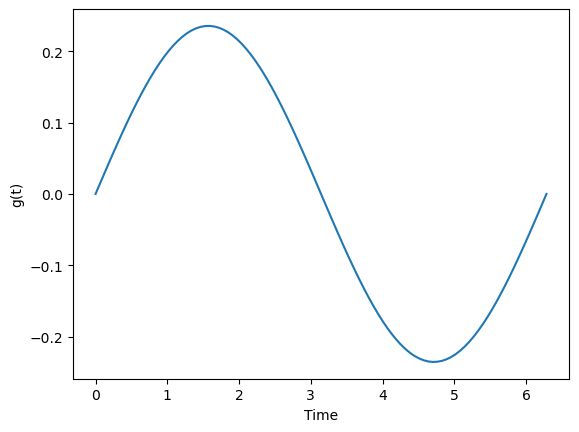

In [12]:
#输入和spatial_kernel 进行二维卷积
def g(t, x_k, sigma1, sigma2, I_0, epsilon, omega, phi, k, theta):
    def integrand(y, x):
        A = spatial_kernel(x_k[0] - x, x_k[1] - y, sigma1, sigma2)
        I = drifting_grating(I_0, epsilon, omega, phi, k, theta, x, y, t)
        return A * I
    result, error = nquad(integrand, [[-np.inf, np.inf], [-np.inf, np.inf]])
    return result

# Define parameters
I_0 = 1
epsilon = 0.5
omega = 1
phi = 0
k = 1
theta = 0
sigma1 = 1
sigma2 = 2
x_k = (0, 0)

# Calculate and plot g(t)
t_values = np.linspace(0, 2 * np.pi, 100)
g_values = [g(t, x_k, sigma1, sigma2, I_0, epsilon, omega, phi, k, theta) for t in t_values]

plt.plot(t_values, g_values)
plt.xlabel('Time')
plt.ylabel('g(t)')
plt.show()

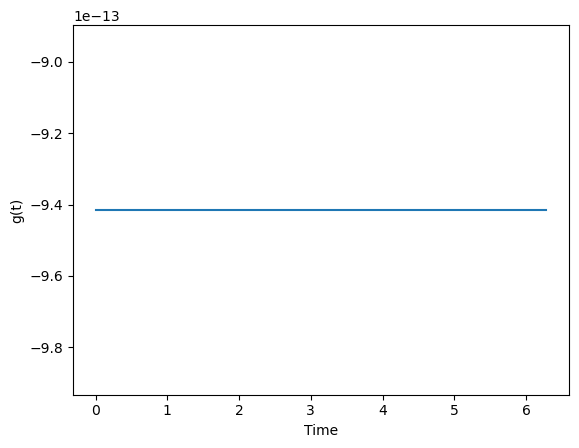

In [15]:
# omega = 0，相当于静态，此时为0
I_0 = 1
epsilon = 0.5
omega = 0
phi = 0
k = 1
theta = 0
sigma1 = 1
sigma2 = 2
x_k = (0, 0)

# Calculate and plot g(t)
t_values = np.linspace(0, 2 * np.pi, 100)
g_values = [g(t, x_k, sigma1, sigma2, I_0, epsilon, omega, phi, k, theta) for t in t_values]

plt.plot(t_values, g_values)
plt.xlabel('Time')
plt.ylabel('g(t)')
plt.show()

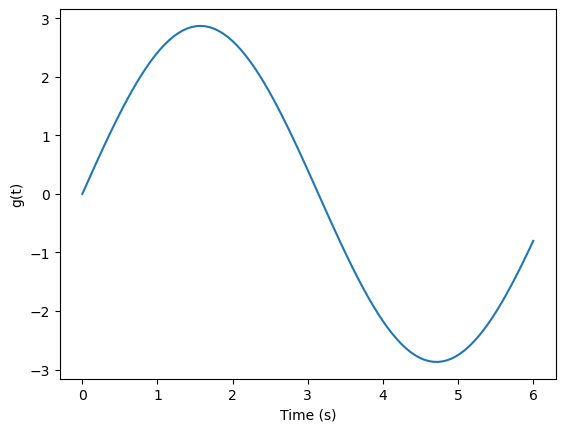

In [9]:
#输入和空间卷积核卷积之后的结果（手算的结果）
I_0 = 1
epsilon = 0.5
omega = 1
phi = 0
k = 1
theta = 0
sigma1 = 1
sigma2 = 2
x_k = (0, 0)

def spatial_conv(t):
    return I_0 * epsilon * np.sin(omega*t-phi+k*np.cos(theta)*x_k[0]+k*np.sin(theta)*x_k[1]) *(np.exp(sigma1**2*k**2/2)-np.exp(sigma2**2*k**2/2))
    
def plot_spatial_conv_t():
    t = np.linspace(0, 6, 100)
    f_t = [-spatial_conv(ti) for ti in t]
    plt.plot(t, f_t)
#     plt.title(f'Spatial-Temporal Response of Gabor Filter at ({x}, {y})')
    plt.xlabel('Time (s)')
    plt.ylabel('g(t)')
    plt.show()

# 绘制随时间变化的函数值
plot_spatial_conv_t()


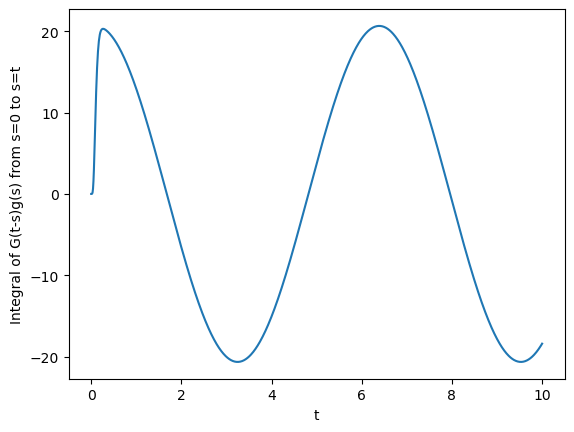

In [10]:
# 定义计算 G(t-s)g(s) 的函数
def Gg(s, t):
    return G(t-s) * -spatial_conv(s)

# 定义计算 G(t-s)g(s) 关于 s 从 0 到 t 积分的函数
def integral_Gg(t):
    s_values = np.linspace(0, t, 1000)  # 将积分区间 [0, t] 分成 1000 个小区间
    Gg_values = Gg(s_values, t)
    integral_value = np.trapz(Gg_values, s_values)  # 使用 numpy.trapz 进行数值积分
    return integral_value

# 绘制 G(t-s)g(s) 关于 s 从 0 到 t 积分后关于 t 的图像
t_values = np.linspace(0, 10, 1000)  # 假设 t 的取值范围为 [0, 10]
integral_values = [integral_Gg(t) for t in t_values]
plt.plot(t_values, integral_values)
plt.xlabel('t')
plt.ylabel('Integral of G(t-s)g(s) from s=0 to s=t')
plt.show()

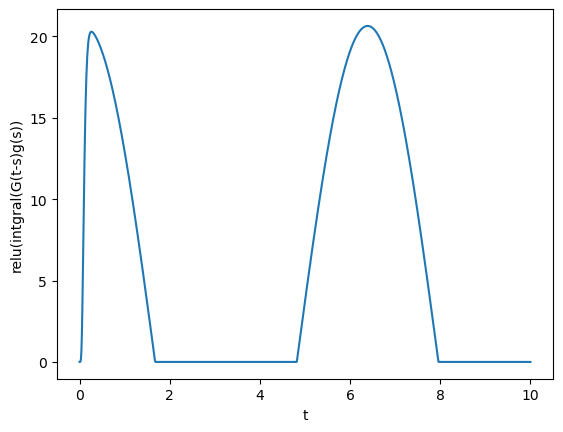

In [12]:
def relu(x):
    return np.maximum(0, x)
# 绘制 G(t-s)g(s) 关于 s 从 0 到 t 积分后经过relu关于 t 的图像
t_values = np.linspace(0, 10, 1000)  # 假设 t 的取值范围为 [0, 10]
integral_values = relu([integral_Gg(t) for t in t_values])
plt.plot(t_values, integral_values)
plt.xlabel('t')
plt.ylabel('relu(intgral(G(t-s)g(s))')
plt.show()
